# YOLO – You Only Look Once

## Cel
Celem tego notatnika jest zrozumienie idei detekcji obiektów przy użyciu algorytmu YOLO oraz praktyczne uruchomienie modelu YOLOv8 do detekcji obiektów na obrazie.

---

## 1. Wprowadzenie

Detekcja obiektów to zadanie polegające na:
- zlokalizowaniu obiektów na obrazie (poprzez współrzędne prostokątów – bounding boxes),
- przypisaniu etykiet klas do wykrytych obiektów.

W przeciwieństwie do klasyfikacji obrazów, detekcja wymaga jednoczesnego **lokalizowania** i **rozpoznawania** obiektów.

---

## 2. Co to jest YOLO

YOLO (You Only Look Once) to rodzina algorytmów, które traktują detekcję obiektów jako **pojedynczy problem regresji** z obrazu wejściowego do prostokątów ograniczających (bounding boxes) i prawdopodobieństw klas.

Zamiast przeszukiwać obraz fragment po fragmencie (jak R-CNN), YOLO przetwarza **cały obraz jednocześnie**, co pozwala na **detekcję w czasie rzeczywistym**.

---

## 3. Podstawowa idea YOLO

1. Obraz wejściowy jest dzielony na siatkę o wymiarach $$ S \times S $$.  
2. Każda komórka siatki przewiduje:
   - $$ B $$ prostokątów ograniczających (bounding boxes),
   - wartość zaufania (confidence) dla każdego prostokąta,
   - prawdopodobieństwa przynależności do poszczególnych klas.
3. Model łączy te informacje w końcowym etapie i wybiera najbardziej prawdopodobne detekcje.

---

## 4. Struktura wyjścia

Dla każdej komórki YOLO zwraca wektor:

$$ [x, y, w, h, conf, p_1, p_2, ..., p_C] $$

gdzie:
- $$ (x, y) $$ – współrzędne środka ramki,
- $$ (w, h) $$ – szerokość i wysokość ramki,
- $$ confidence $$ – prawdopodobieństwo, że w ramce znajduje się obiekt,
- $$ p_i $$ – prawdopodobieństwo przynależności do klasy $$ i $$,
- $$ C $$ – liczba klas.

---

## 5. Funkcja straty

YOLO wykorzystuje kombinację kilku składników funkcji kosztu:

$$
L = \lambda_{coord} \sum_{i=0}^{S^2} \sum_{j=0}^{B} \mathbf{1}_{ij}^{obj}[(x_i - \hat{x}_i)^2 + (y_i - \hat{y}_i)^2] \\
+ \lambda_{coord} \sum_{i=0}^{S^2} \sum_{j=0}^{B} \mathbf{1}_{ij}^{obj}[(\sqrt{w_i} - \sqrt{\hat{w}_i})^2 + (\sqrt{h_i} - \sqrt{\hat{h}_i})^2] \\
+ \sum_{i=0}^{S^2} \sum_{j=0}^{B} \mathbf{1}_{ij}^{obj}(C_i - \hat{C}_i)^2
+ \lambda_{noobj} \sum_{i=0}^{S^2} \sum_{j=0}^{B} \mathbf{1}_{ij}^{noobj}(C_i - \hat{C}_i)^2
+ \sum_{i=0}^{S^2} \mathbf{1}_{i}^{obj} \sum_{c \in classes}(p_i(c) - \hat{p}_i(c))^2
$$

gdzie:
- $$ \mathbf{1}_{ij}^{obj} $$ = 1, jeśli w komórce znajduje się obiekt, w przeciwnym wypadku 0,  
- $$ \lambda_{coord} $$ i $$ \lambda_{noobj} $$ to współczynniki wag.

---

## 6. Wersje YOLO

- **YOLOv1 (2016)** – pierwsza wersja, prosta architektura CNN.  
- **YOLOv2 / YOLO9000** – ulepszona dokładność i liczba klas.  
- **YOLOv3 / YOLOv4** – głębsza sieć, wiele skal.  
- **YOLOv5 / YOLOv8** – nowoczesne implementacje z PyTorch, optymalizacja prędkości i dokładności.  

W tym notatniku wykorzystamy model **YOLOv8** z biblioteki **Ultralytics**.

---

## 7. Zastosowania YOLO

- Systemy bezpieczeństwa (monitoring, rozpoznawanie osób),
- Samochody autonomiczne (detekcja pieszych i pojazdów),
- Analiza wideo i obrazów medycznych,
- Rozpoznawanie obiektów w czasie rzeczywistym z kamery.

---

## 8. Podsumowanie

YOLO jest jednym z najszybszych i najbardziej efektywnych algorytmów detekcji obiektów.  
Dzięki jednoczesnemu przewidywaniu klas i lokalizacji, może działać w czasie rzeczywistym na CPU lub GPU.


## CZEŚĆ 2: Praktyka — model YOLO krok po krok

In [ ]:
!pip install ultralytics -q

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:

import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\jakub\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Wczytanie gotowego modelu YOLOv8 (wersja "s" – small)
model = YOLO("yolov8s.pt")

# Sprawdzenie struktury modelu
model.info()


YOLOv8s summary: 129 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs


(129, 11166560, 0, 28.816844800000002)

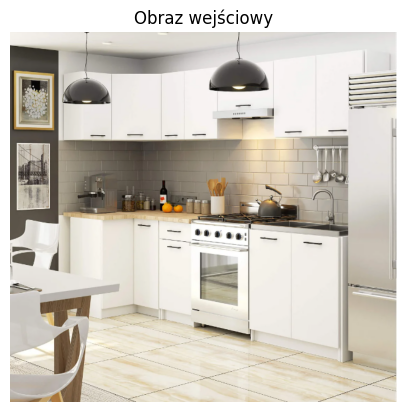

In [ ]:
# Podaj nazwę pliku, np. "elephant.jpeg"
image_path = "../kuchnia_jolo.png"

# Wyświetlenie oryginalnego obrazu
img = plt.imread(image_path)
plt.imshow(img)
plt.axis("off")
plt.title("Obraz wejściowy")
plt.show()


In [ ]:
# Wykrywanie obiektów
results = model.predict(source=image_path, show=True, conf=0.15)



image 1/1 c:\Users\jakub\workspace\SWPS_2\jupyther\..\kuchnia_jolo.png: 640x640 5 bottles, 4 cups, 7 spoons, 1 bowl, 2 oranges, 4 chairs, 3 dining tables, 2 ovens, 3 sinks, 1 refrigerator, 65.7ms
Speed: 2.3ms preprocess, 65.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Zapis wyników (jeśli chcesz je obejrzeć później)
results[0].save(filename="yolo_result_4.jpg")

# Wyświetlenie wykrytych klas
for r in results:
    print(r.boxes.cls)


tensor([72., 44., 56., 49., 56., 39., 49., 44., 69., 69., 60., 39., 44., 44., 41., 41., 44., 39., 41., 56., 44., 44., 71., 41., 56., 60., 71., 39., 71., 60., 45., 39.])


### Analiza wyników
- YOLO wykrył obiekty wraz z etykietami i współrzędnymi.
- Każda detekcja zawiera:
  - nazwę klasy,
  - wartość confidence (prawdopodobieństwo poprawnej detekcji),
  - współrzędne prostokąta ograniczającego.


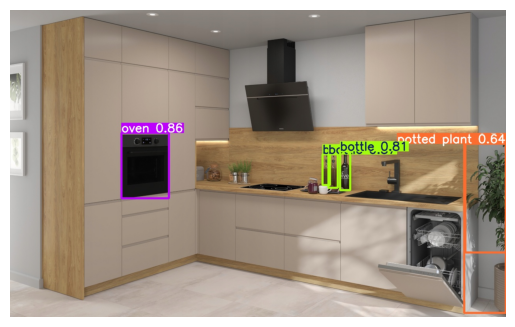

In [ ]:
img = plt.imread("yolo_result_4.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("")
plt.show()

